In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Scrubbed or not detection/

/gdrive/MyDrive/Scrubbed or not detection


In [4]:
ls

Bleached/  Unbleached/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [7]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=20
CHANNELS=3

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Scrubbed or not detection",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 600 files belonging to 2 classes.


In [9]:
class_names = dataset.class_names
class_names

['Bleached', 'Unbleached']

In [10]:
len(dataset)

10

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[ 17.        87.       100.      ]
  [ 21.15039   90.32031  101.66016 ]
  [ 24.15039   91.7168   103.43359 ]
  ...
  [ 70.36328  141.53125  123.68164 ]
  [ 88.490234 151.98047  131.64062 ]
  [ 86.       147.       125.      ]]

 [[ 20.320312  87.83008  102.490234]
  [ 21.714584  89.77233  103.461365]
  [ 22.365398  89.696724 104.49875 ]
  ...
  [ 69.21706  139.77544  118.35585 ]
  [ 78.86003  145.93646  126.44291 ]
  [ 90.15039  151.98047  134.96094 ]]

 [[ 19.566406  87.2832   105.15039 ]
  [ 22.776474  87.753365 101.22049 ]
  [ 22.405998  88.16041  102.67421 ]
  ...
  [ 81.07277  144.5414   121.985   ]
  [ 84.48784  147.06522  126.1895  ]
  [ 86.69922  149.41602  131.26562 ]]

 ...

 [[ 32.583984  82.60156   68.31836 ]
  [ 22.623047  64.45009   51.702206]
  [ 15.959805  52.107613  40.080017]
  ...
  [203.52394  177.67705   72.4341  ]
  [174.47227  132.40956   26.014442]
  [192.38867  166.70703   61.40625 ]]

 [[ 26.960938  71.11133   56.45117 ]
  [ 19.6

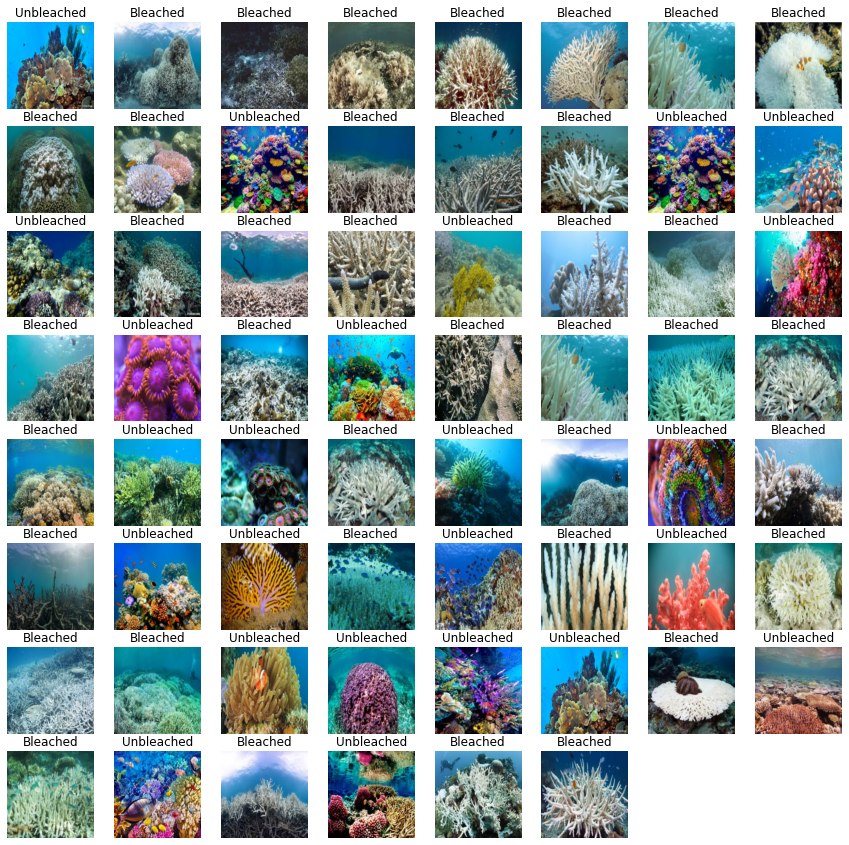

In [29]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model.summary()

In [20]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
8/8 [==============================] - 65s 7s/step - loss: 1.4020 - accuracy: 0.4435 - val_loss: 0.7172 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 53s 7s/step - loss: 0.7884 - accuracy: 0.4859 - val_loss: 0.7256 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 53s 7s/step - loss: 0.7155 - accuracy: 0.4919 - val_loss: 0.6854 - val_accuracy: 0.5968
Epoch 4/20
8/8 [==============================] - 52s 7s/step - loss: 0.6562 - accuracy: 0.6210 - val_loss: 0.5888 - val_accuracy: 0.6452
Epoch 5/20
8/8 [==============================] - 53s 7s/step - loss: 0.4598 - accuracy: 0.7944 - val_loss: 0.2216 - val_accuracy: 0.9516
Epoch 6/20
8/8 [==============================] - 52s 7s/step - loss: 0.2843 - accuracy: 0.8770 - val_loss: 0.1916 - val_accuracy: 0.8871
Epoch 7/20
8/8 [==============================] - 53s 7s/step - loss: 0.2434 - accuracy: 0.8972 - val_loss: 0.1833 - val_accuracy: 0.9516
Epoch 8/20
8/8 [==================

In [21]:
model.evaluate(test_ds)

1/1 [==============================] - 4s 4s/step - loss: 0.0345 - accuracy: 1.0000


[0.03446027263998985, 1.0]

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

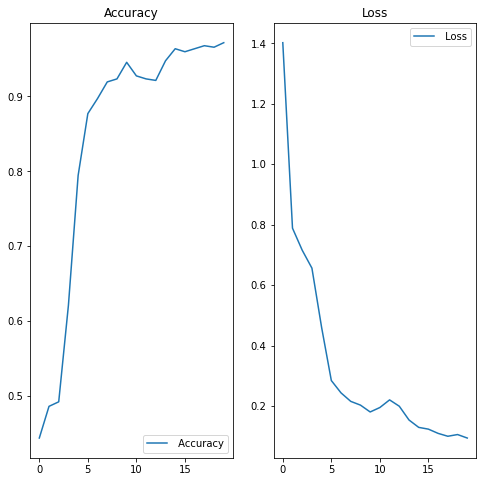

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

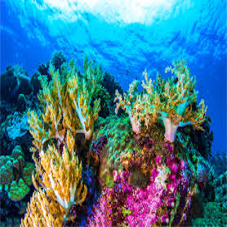

In [24]:
image_path = "/gdrive/My Drive/193.png"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [25]:
pred = model.predict(scaled_img)

In [26]:
output = class_names[np.argmax(pred)]

In [27]:
output

'Unbleached'

In [28]:
model.save("Scrubbed or not detection.h5")